In [1]:
"""
This notebook generates figure 6
The obs measurements dataset is used to determine the maximum dimension and axis ratio
The LAT_stats.zip files are used to generate the LAT analysis (wet growth fractions)
"""

'\nThis notebook generates figure 6\nThe obs measurements dataset is used to determine the maximum dimension and axis ratio\nThe LAT_stats.zip files are used to generate the LAT analysis (wet growth fractions)\n'

In [8]:
import os
from glob import glob
import warnings
import json
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

In [37]:
#reference data from manual hailstone measurements
obs_csv = '/home/meso/Insync/onedrive/sync/papers/hail-xsec_paper/obs-output/obs_measurements.csv'
obs_df = pd.read_csv(obs_csv)
Deq = obs_df['oblate_spheroid_dmax_dmin_Deq_mm']
Dmax = obs_df['dmax_mm']

axis_ratio = obs_df['axis_ratio_dmin_over_dmax']
obs_id = obs_df['id_old']

In [38]:
#LAT stats files (unziped)
stats_root = '/home/meso/data/cross-section-paper-data/analysis/paper_outputs/pipeline_stats'

In [39]:
#list stats files
npz_ffn_list = sorted(glob(stats_root + '/*.npz'))

#init outputs
hail_id_list = []
mean_edge_radius_list = []
total_dry_sa = []
n_layers = []
largest_sa = []
last_sa = []
total_dry_sa = []
n_layers = []
final_wetgrowth = []

#unpack npz files into variables
for npz_ffn in npz_ffn_list:
    npz_fn = os.path.basename(npz_ffn)
    hail_id = int(npz_fn[6:8])
    
    data = np.load(npz_ffn)
    hail_id_list.append(hail_id)
    output_sa_array = data['output_sa_array']
    inner_array = data['output_inner_array']
    outer_array = data['output_output_array']
    mean_edge_radius_list.append(data['mean_edge_radius'])
    
    total_dry_sa.append(np.sum(output_sa_array))
    n_layers.append(len(output_sa_array))
    largest_sa.append(np.max(output_sa_array))
    last_sa.append(output_sa_array[0])
    
    tmp = (math.pi*(data['mean_edge_radius']**2)) - (math.pi*(outer_array[0]**2))
    try:
        tmp = (math.pi*(inner_array[0]**2)) - (math.pi*(outer_array[1]**2))
    except:
        #case for only one layer as the outer layer
        tmp = (math.pi*(data['mean_edge_radius']**2)) - output_sa_array[0]
            
    if tmp/(math.pi*(outer_array[0]**2)) < 0.2:
        print(hail_id, tmp/(math.pi*(outer_array[0]**2)))
    final_wetgrowth.append(tmp)
    
#convert lists to numpy arrays
mean_edge_radius_array = np.array(mean_edge_radius_list)
total_dry_array = np.array(total_dry_sa)
n_layers_array = np.array(n_layers)
axis_ratio_array = np.array(axis_ratio_array)
last_sa_array = np.array(last_sa)
largest_sa_array = np.array(largest_sa)
final_wetgrowth_array = np.array(final_wetgrowth)

#calculate area
total_area = math.pi*(mean_edge_radius_array**2)

#calculate fractions
perc_dry_growth = total_dry_array/total_area
perc_largest_sa = largest_sa_array/total_area
perc_final_drygrowth = last_sa_array/total_area
perc_final_wetgrowth = final_wetgrowth_array/total_area

[1.         0.87037037 0.76666667 0.8245614  0.74906367 0.94238683
 0.95652174 0.85111111 0.88235294 0.52897196 0.88541667 0.93012048
 0.97031963 0.82846004 0.98444444 0.85436893 0.80745342 0.91489362
 0.70917226 0.97402597 0.75       0.73809524 0.8245614  0.51282051
 0.92424242 0.89240506 0.86398554 0.82410423 0.85531197 0.84232804
 0.74       0.94029851 0.94583333 0.84367246 0.88169399 0.89076003
 0.90928144 0.94699922 0.78151261 0.95744681]


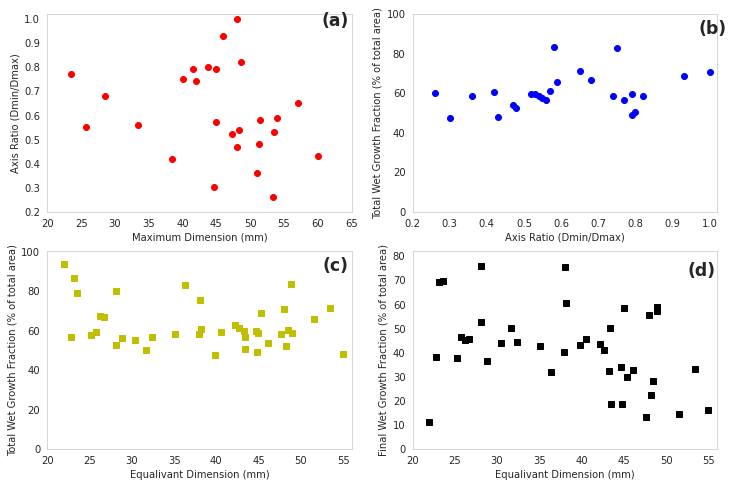

In [42]:
#create figure showing observed hailstone statistics

print(axis_ratio_array)
fig = plt.figure(figsize=[12,8], facecolor='w')

plt.subplot(221)
plt.plot(Dmax, axis_ratio, 'ro')
plt.xlabel('Maximum Dimension (mm)')
plt.ylabel('Axis Ratio (Dmin/Dmax)')
plt.xlim([20, 65])
plt.ylim([0.2, 1.02])
plt.text(60.5, 0.97, '(a)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(222)
wet_growth_faction = 100-perc_dry_growth*100
plt.plot(axis_ratio, wet_growth_faction, 'bo')
plt.xlabel('Axis Ratio (Dmin/Dmax)')
plt.ylabel('Total Wet Growth Fraction (% of total area)')
plt.xlim([0.2, 1.02])
plt.ylim([0, 100])
plt.text(0.97, 90, '(b)', size='xx-large', weight='bold')
plt.grid()

plt.subplot(223)
plt.plot(Deq, wet_growth_faction, 'ys')
plt.xlabel('Equalivant Dimension (mm)')
plt.ylabel('Total Wet Growth Fraction (% of total area)')
plt.xlim([20, 56])
plt.ylim([0, 100])
plt.grid()
plt.text(52.5, 90, '(c)', size='xx-large', weight='bold')

plt.subplot(224)
plt.plot(Deq, perc_final_wetgrowth*100, 'ks')
plt.xlabel('Equalivant Dimension (mm)')
plt.ylabel('Final Wet Growth Fraction (% of total area)')
plt.xlim([20,56])
plt.ylim([0, 82])
plt.text(52.5, 72, '(d)', size='xx-large', weight='bold')
plt.grid()

plt.savefig('fig05.png', dpi=150)

51.59633027036548
70.89998353176807
62.58971278841865


/home/meso/miniconda3/envs/hail-xsec/lib/python3.10/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


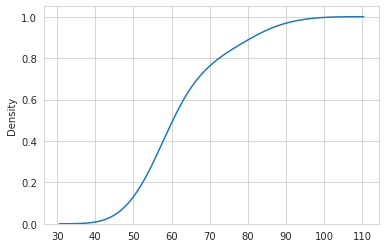

In [28]:
#create figure (not in paper) for the CDF of wet growth fraction
sns.set_style('whitegrid')
sns.kdeplot(wet_growth_faction, cumulative=True, bw=0.5)
print(np.percentile(wet_growth_faction, 12))
print(np.percentile(wet_growth_faction, 80))
print(np.mean(wet_growth_faction))